In [427]:
# numpy for math calculation
# pandas for loading the csv file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [428]:
# load the csv file
df = pd.read_csv('data.csv')

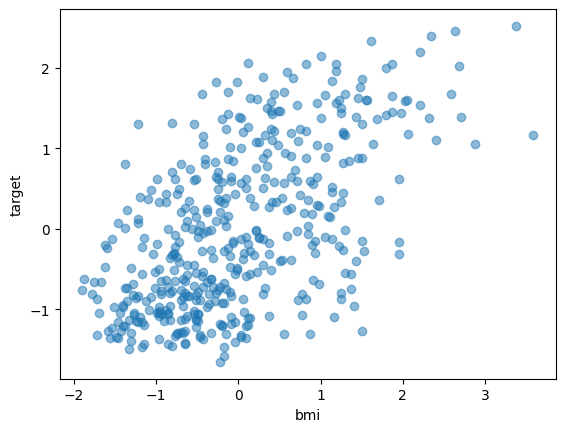

In [429]:
# extract x and y, convert them into numpy array
# .value is for converting pandas series to numpy 1d array
x = df['bmi'].values
y = df['target'].values

# Z-score normalization
x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()

plt.scatter(x, y, alpha=0.5, label='Data')
plt.xlabel("bmi")
plt.ylabel("target")
plt.show()

In [430]:
# reshape to 2d array
# -1 means automatically calculate the row number
x = x.reshape(-1, 1)
y = y.reshape(-1, 1) # Ensure dimensions are consistent
print(x.shape, y.shape)

(442, 1) (442, 1)


In [431]:
# initialize the parameters
# The normal distribution is used because initializing 
# the parameters around 0 can 
# help the model start symmetrically 
# and improve training stability when there are multiple features.
# When initializing model parameters, using random values (like np.random.randn)
# is important to break symmetry—if all weights start with the same value 
# (e.g., 0), they will receive identical gradients during training, learn the 
# same thing, and fail to converge. This is known as the symmetry breaking 
# problem. Additionally, using 0.0 instead of 0 ensures that all computations 
# are performed in floating-point precision, which avoids issues like integer 
# division and implicit type promotion. Floating-point operations are essential 
# for stable and accurate optimization in machine learning models.
w = np.random.randn()
b = 0.0

In [432]:
lr = 0.0001 # learning rate
epochs = 100000 # the number of iterations

In [433]:
# start the loop
losses = [] # track the loss
for epoch in range(epochs):
    y_pred = x*w + b # element wise broadcasting
    loss = np.mean((y_pred-y)**2) #calculating the Mean Squared Error MSE
    if epoch % 100 == 0:
        print(f"Epoch{epoch}: Loss = {loss:.4f}")
    dw = np.mean(2 * x * (y_pred-y)) #defining dw
    db = np.mean(2 * (y_pred - y)) #defining db
    w = w - lr * dw
    b = b - lr * db # Gradient descent
    losses.append(loss)


Epoch0: Loss = 0.7060
Epoch100: Loss = 0.7040
Epoch200: Loss = 0.7022
Epoch300: Loss = 0.7003
Epoch400: Loss = 0.6986
Epoch500: Loss = 0.6969
Epoch600: Loss = 0.6953
Epoch700: Loss = 0.6938
Epoch800: Loss = 0.6923
Epoch900: Loss = 0.6909
Epoch1000: Loss = 0.6895
Epoch1100: Loss = 0.6882
Epoch1200: Loss = 0.6870
Epoch1300: Loss = 0.6857
Epoch1400: Loss = 0.6846
Epoch1500: Loss = 0.6835
Epoch1600: Loss = 0.6824
Epoch1700: Loss = 0.6814
Epoch1800: Loss = 0.6804
Epoch1900: Loss = 0.6794
Epoch2000: Loss = 0.6785
Epoch2100: Loss = 0.6776
Epoch2200: Loss = 0.6768
Epoch2300: Loss = 0.6760
Epoch2400: Loss = 0.6752
Epoch2500: Loss = 0.6744
Epoch2600: Loss = 0.6737
Epoch2700: Loss = 0.6730
Epoch2800: Loss = 0.6724
Epoch2900: Loss = 0.6717
Epoch3000: Loss = 0.6711
Epoch3100: Loss = 0.6705
Epoch3200: Loss = 0.6700
Epoch3300: Loss = 0.6694
Epoch3400: Loss = 0.6689
Epoch3500: Loss = 0.6684
Epoch3600: Loss = 0.6679
Epoch3700: Loss = 0.6674
Epoch3800: Loss = 0.6670
Epoch3900: Loss = 0.6666
Epoch4000: L

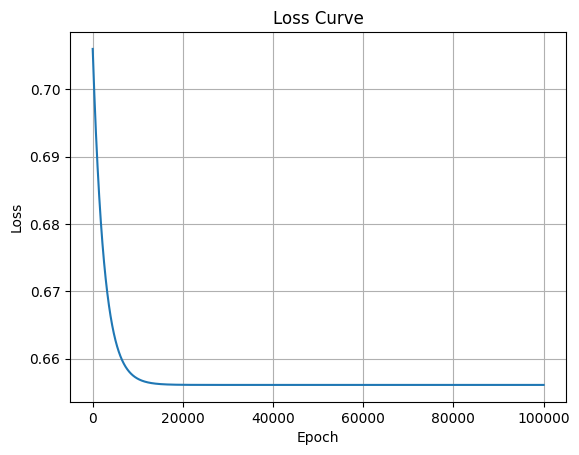

In [434]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.grid(True)
plt.show()

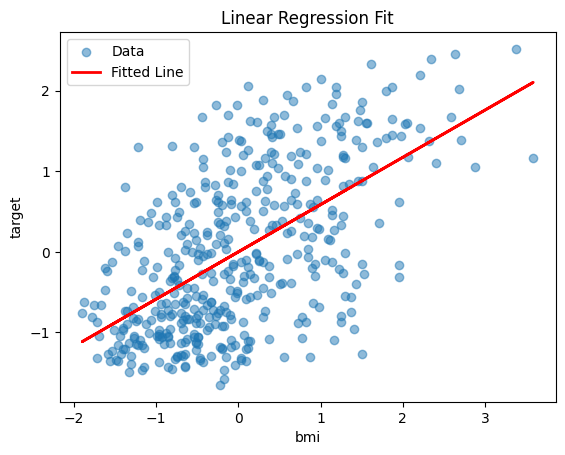

In [435]:
# Original Scatter plot
plt.scatter(x, y, alpha=0.5, label='Data')

# fit the straight line
y_fit = x * w + b
plt.plot(x, y_fit, color='red', linewidth=2, label='Fitted Line')

plt.xlabel("bmi")
plt.ylabel("target")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

In [436]:
print(f"w:{w}")
print(f"b:{b}")

w:0.586450134934259
b:-1.3878089225828195e-16
